# Introduction

* Hello, my name is Shorter
* This is a project attempting to construct a ML model to predict unemployment

## Project Objective 
* Analyze data from U.S. Census Bureau's October 2022 Current Population Surve
* To predict unemployment status of respondents to the survey utilizing ML techniques based around classification

## Executive Summary


*
*

# Import Section

In [1]:
import pandas as pd
import model
import explore
import wrangle

from importlib import reload
reload(wrangle)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#calling prepare/acquire functions from module to acquire and split data subsets
train, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.model_prep()

## Exploration Questions 
* Includes visualizations and statistical tests
* Primarily focused on items that appear on the typical resume or job application

---
### Spotlight - Industry 
* **Question:** Which industry shows the largest population proportion change between employed and unemployed?  
* **Answer:** Leisure and Hospitality. This industry also has the highest unemployment rate at 6%

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between industry of typical employment and employment status   
>* ${H_a}$: There is a relationship between industry of typical employment and employment status  
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27815 entries, 2853 to 29968
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   housing_type                27815 non-null  object  
 1   household_num               27815 non-null  float64 
 2   family_income               27815 non-null  category
 3   household_type              27815 non-null  object  
 4   own_bus_or_farm             27815 non-null  int64   
 5   region                      27815 non-null  object  
 6   metropolitan                27815 non-null  object  
 7   metro_area_size             27815 non-null  float64 
 8   age                         27815 non-null  float64 
 9   marital_status              27815 non-null  object  
 10  is_male                     27815 non-null  int64   
 11  veteran                     27815 non-null  int64   
 12  education                   27815 non-null  category
 13  race         

chi^2: 122.0291
p: 0.0000
degrees of freedom: 12
Reject null hypothesis


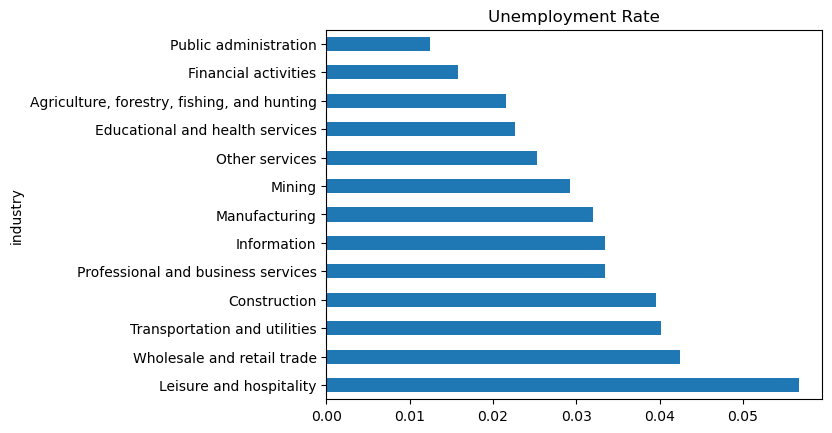

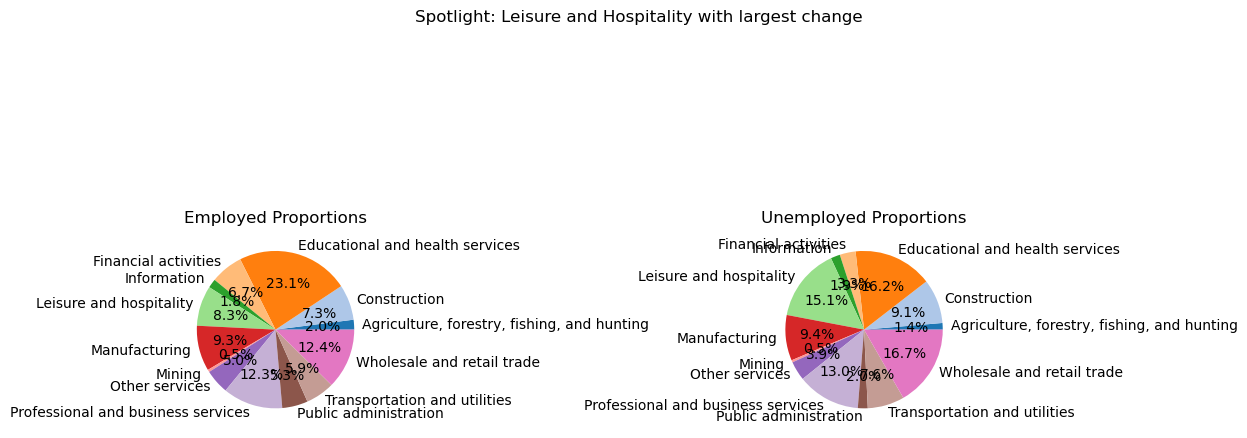

population_proportions             \
                                                          employed unemployed   
industry                                                                        
Leisure and hospitality                                      0.083      0.151   
Wholesale and retail trade                                   0.124      0.167   
Transportation and utilities                                 0.059      0.076   
Construction                                                 0.073      0.091   
Professional and business services                           0.123      0.130   
Information                                                  0.018      0.019   
Manufacturing                                                0.093      0.094   
Mining                                                       0.005      0.005   
Other services                                               0.050      0.039   
Educational and health services                              0.231      0.162   
Agriculture, forestry, fishing, and hunting                  0.020      0.014   
Financial activities                                         0.067      0.033   
Public administration                                        0.053      0.020   

                                                   unemployment_rate  
                                            change                    
industry                                                              
Leisure and hospitality                      0.068             0.057  
Wholesale and retail trade                   0.043             0.042  
Transportation and utilities                 0.016             0.040  
Construction                                 0.018             0.040  
Professional and business services           0.006             0.034  
Information                                  0.001             0.033  
Manufacturing                                0.000             0.032  
Mining                                      -0.000             0.029  
Other services                              -0.011             0.025  
Educational and health services             -0.069             0.023  
Agriculture, forestry, fishing, and hunting -0.007             0.022  
Financial activities                        -0.034             0.016  
Public administration                       -0.032             0.012

In [5]:
#calls function to display visuals and results of statistical analysis and testing
explore.spotlight_stats(train, 'industry', 'Leisure and Hospitality with largest change')

---
### Spotlight - Race
* **Question:** Which industry shows the largest population proportion change between employed and unemployed?

* **Answer:** Indivduals identifying as White show the largest population proportion change with a drop of nearly 10% when comparing employed vs unemployed. Those identifying as mixed race other than with white, and Indigenous have the highest unemployed rates at 12% and 7% respectively. 

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between `race` and `employment` status   
>* ${H_a}$: There is a relationship between `race` and `employment` status   
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

chi^2: 92.7950
p: 0.0000
degrees of freedom: 6
Reject null hypothesis


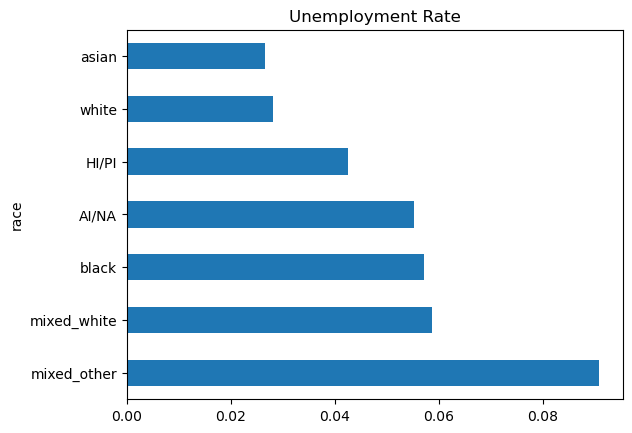

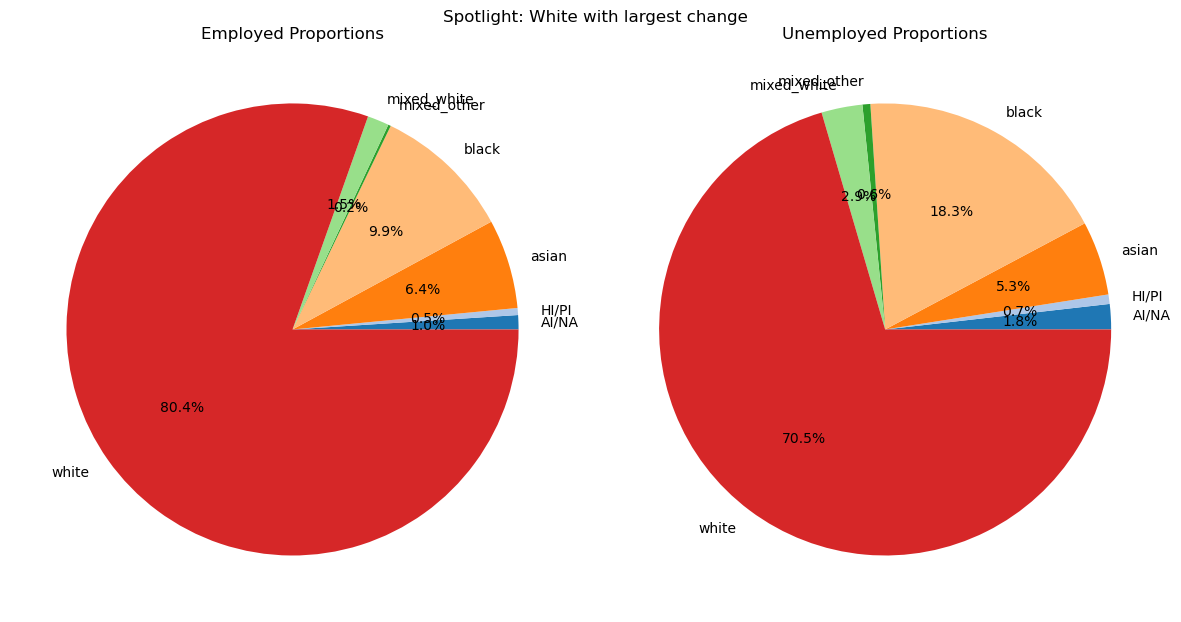

population_proportions                   unemployment_rate
                          employed unemployed change                  
race                                                                  
mixed_other                  0.002      0.006  0.004             0.091
mixed_white                  0.015      0.029  0.014             0.059
black                        0.099      0.183  0.083             0.057
AI/NA                        0.010      0.018  0.008             0.055
HI/PI                        0.005      0.007  0.002             0.043
white                        0.804      0.705 -0.100             0.028
asian                        0.064      0.053 -0.011             0.027

In [6]:
#calls function to display visuals and results of statistical analysis and testing
explore.spotlight_stats(train, 'race', 'White with largest change')

---
### Spotlight - Professional Certification
* **Question:** What is the effect of having a professional certification? 
 
* **Answer:** Most indivduals do not have certification, but those that do have a 2% unemployment rate vs 4% for those without.

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between having a `professional_certification` and `employment`  
>* ${H_a}$: There is a relationship between having a `professional_certification` and `employment`    
>* ${\alpha}$: .05
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

chi^2: 103.9291
p: 0.0000
degrees of freedom: 1
Reject null hypothesis


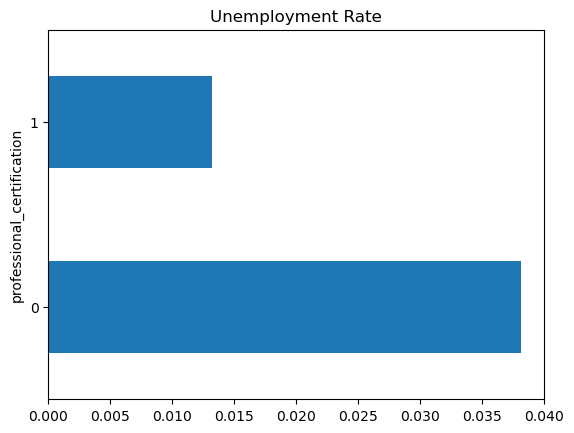

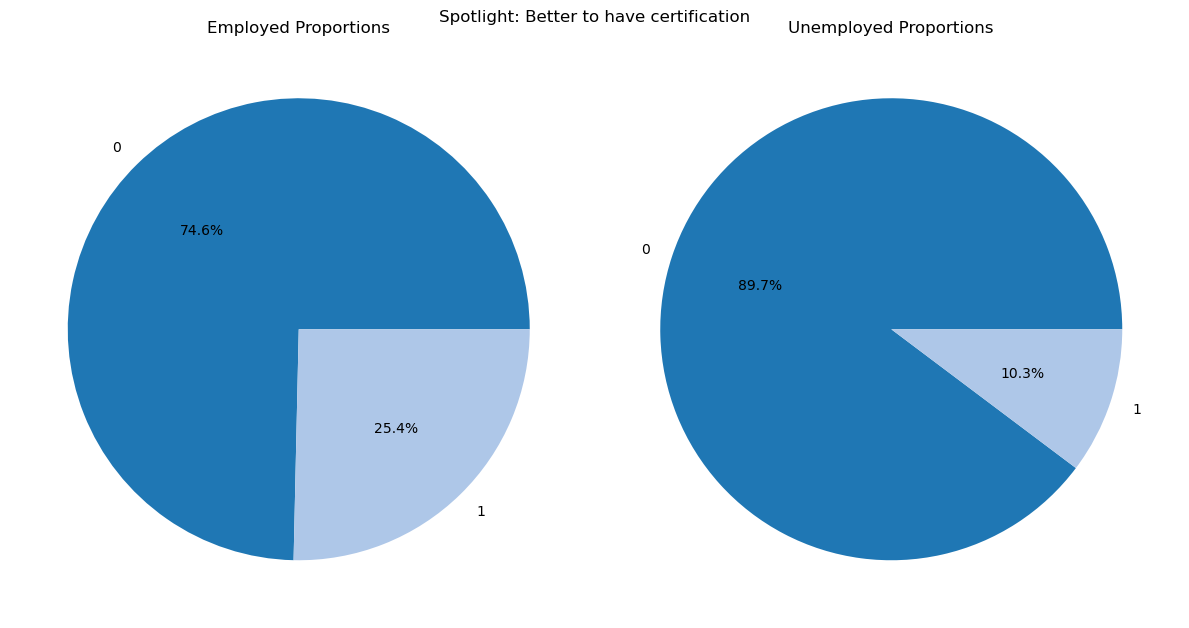

population_proportions                    \
                                         employed unemployed change   
professional_certification                                            
0                                           0.746      0.897  0.151   
1                                           0.254      0.103 -0.151   

                           unemployment_rate  
                                              
professional_certification                    
0                                      0.038  
1                                      0.013

In [7]:
#calls function to display visuals and results of statistical analysis and testing
explore.spotlight_stats(train, 'professional_certification', 'Better to have certification')

## Exploration Summary
* Overall the conventional wisdom surrounding job prospects held true.

* It benefits an indvidual to acquire advanced dregrees and certifications
* Having a job or career in an industry that leans more towards being a profession helps
* With more time I want to dive into cross examinations of factors to see how they interact, but I'm doubtful that would help more than simply satisfying my curiousity. 

# Modeling
* Decided to focus on only three types of models for this iteration of project.
* DTC modeling showed promise, but was prone to overfitting when it came time for use on the validation and test subsets
* Linear SVC and XGBOOST performed worse during the model phase, and they were not moved forward.
* Further iterations of project will focus much more on exploration and feature reduction in order to reduce noise and dimensionality. 


## Validate


## Test
* Best Performing Model:


# Conclusion
## Summary of Key Findings
*
---
## Suggestions and Next Steps
>* 